In [176]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import sys
import scipy as sp
import statsmodels as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
%matplotlib inline

In [177]:
sales_df=pd.read_csv("sales_promo_data.csv", parse_dates=True)

In [178]:
sales_df.head()

,Category,5-Jan-19,12-Jan-19,19-Jan-19,26-Jan-19,2-Feb-19,9-Feb-19,16-Feb-19,23-Feb-19,2-Mar-19,...,19-Apr-21,26-Apr-21,3-May-21,10-May-21,17-May-21,24-May-21,31-May-21,7-Jun-21,14-Jun-21,21-Jun-21
0,Acne,14969813.0,15488855.0,15522357.0,15054219.0,14585357.0,14753443.0,14809032.0,15195875.0,16148805.0,...,6804803.45,6338797.51,6221003.71,6161488.20,6484463.04,6622980.76,6564619.3,6727304.43,6976630.14,6852588.56
1,acne_promo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
2,Baby,1417338.0,1515492.0,1562793.0,1555259.0,1638797.0,1531476.0,1454065.0,1658709.0,1854319.0,...,164551.25,135085.59,133168.42,131380.27,151697.29,135258.65,131589.5,143072.75,155263.75,132207.15
3,baby_promo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
4,Bath,55558.0,59528.0,56189.0,56073.0,60760.0,61017.0,60160.0,67015.0,74080.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00


In [179]:
sales_df=sales_df.rename(columns={"Category":"Date"})

In [180]:
sales_df.index = pd.to_datetime(sales_df.index)

In [181]:
sales_df=sales_df.T

In [182]:
sales_df.columns= sales_df.iloc[0]

In [183]:
sales_df=sales_df.iloc[1:,:]
sales_df.head()

Date,Acne,acne_promo,Baby,baby_promo,Bath,bath_promo,Body Wash,body_promo,Hair,hair_promo,Lotion,lotion_promo,Makeup,makeup_promo,Shaving,shaving_promo,Sunscreen,sunscreen_promo,Tanner,tanner_promo
5-Jan-19,1.49698e+07,0,1.41734e+06,0,55558,0,1.49122e+06,0,929666,0,3.22783e+06,0,7.15666e+06,0,273010,0,1.66175e+06,0,84682,0
12-Jan-19,1.54889e+07,0,1.51549e+06,0,59528,0,1.59943e+06,0,1.04239e+06,0,3.55188e+06,0,7.18866e+06,0,283501,0,1.43475e+06,0,78632,0
19-Jan-19,1.55224e+07,0,1.56279e+06,0,56189,0,1.40911e+06,0,1.04888e+06,0,3.43581e+06,0,7.17324e+06,0,266646,0,1.42346e+06,0,81813,0
26-Jan-19,1.50542e+07,0,1.55526e+06,0,56073,0,1.38705e+06,0,1.10439e+06,0,3.40686e+06,0,6.85142e+06,0,264479,0,1.36637e+06,0,82477,0
2-Feb-19,1.45854e+07,0,1.6388e+06,0,60760,0,1.47958e+06,0,1.23534e+06,0,3.75449e+06,0,6.74574e+06,0,265783,0,1.49604e+06,0,89832,0


In [184]:
sales_df.index = pd.to_datetime(sales_df.index)

In [185]:
acne_df= sales_df[["Acne","acne_promo"]]
baby_df= sales_df[["Baby","baby_promo"]]
bath_df= sales_df[["Bath","bath_promo"]]
body_df= sales_df[["Body Wash","body_promo"]]
hair_df= sales_df[["Hair","hair_promo"]]
lotion_df= sales_df[["Lotion","lotion_promo"]]
makeup_df= sales_df[["Makeup","makeup_promo"]]
shaving_df= sales_df[["Shaving","shaving_promo"]]
sunscreen_df= sales_df[["Sunscreen","sunscreen_promo"]]
tanner_df= sales_df[["Tanner","tanner_promo"]]

In [186]:
acne_df

Date,Acne,acne_promo
2019-01-05,1.49698e+07,0
2019-01-12,1.54889e+07,0
2019-01-19,1.55224e+07,0
2019-01-26,1.50542e+07,0
2019-02-02,1.45854e+07,0
...,...,...
2021-05-24,6.62298e+06,0
2021-05-31,6.56462e+06,0
2021-06-07,6.7273e+06,0
2021-06-14,6.97663e+06,0


In [187]:
acne_df.dtypes

Date
Acne          object
acne_promo    object
dtype: object

<AxesSubplot:>

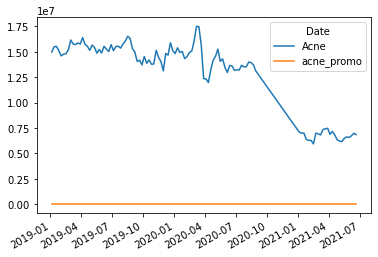

In [188]:
acne_df.plot()

In [263]:
X = acne_df['Acne'].to_frame()

In [264]:
# X = acne_df["Acne"].loc["2019 jan": "2019 dec"].to_frame() 

In [265]:
# In this example, we want to use the week of the year to predict the sales

In [266]:
# Generate a column with the week of the year
X['Week_of_Year'] = X.index.weekofyear
X.head()


C:\Users\Dev\Anaconda3\envs\pyviz\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


,Acne,Week_of_Year
2019-01-05,14969813,1
2019-01-12,15488855,2
2019-01-19,15522357,3
2019-01-26,15054219,4
2019-02-02,14585357,5


In [289]:
acne_week=X.copy()

<AxesSubplot:xlabel='Week_of_Year', ylabel='Acne'>

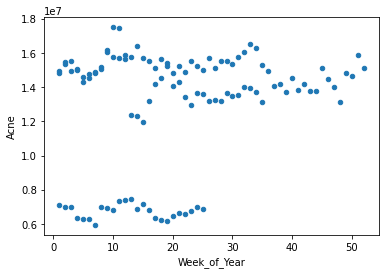

In [159]:
X.plot(x= "Week_of_Year", y="Acne", kind="scatter")

In [160]:
# Binary encode the weekly column to use as new input features for the model
X_binary_encoded = pd.get_dummies(X, columns=['Week_of_Year'])
X_binary_encoded.head()

,Acne,Week_of_Year_1,Week_of_Year_2,Week_of_Year_3,Week_of_Year_4,Week_of_Year_5,Week_of_Year_6,Week_of_Year_7,Week_of_Year_8,Week_of_Year_9,...,Week_of_Year_43,Week_of_Year_44,Week_of_Year_45,Week_of_Year_46,Week_of_Year_47,Week_of_Year_48,Week_of_Year_49,Week_of_Year_50,Week_of_Year_51,Week_of_Year_52
2019-01-05,1.49698e+07,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-12,1.54889e+07,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-19,1.55224e+07,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-26,1.50542e+07,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-02-02,1.45854e+07,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [161]:
# The Acne Sales column must be deleted from the input features
X_binary_encoded = X_binary_encoded.drop('Acne', axis=1)
X_binary_encoded.head()

,Week_of_Year_1,Week_of_Year_2,Week_of_Year_3,Week_of_Year_4,Week_of_Year_5,Week_of_Year_6,Week_of_Year_7,Week_of_Year_8,Week_of_Year_9,Week_of_Year_10,...,Week_of_Year_43,Week_of_Year_44,Week_of_Year_45,Week_of_Year_46,Week_of_Year_47,Week_of_Year_48,Week_of_Year_49,Week_of_Year_50,Week_of_Year_51,Week_of_Year_52
2019-01-05,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-12,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-19,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-26,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-02-02,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [162]:
# The target for our model is to predict the Acne Sales
y = acne_df['Acne'].copy()

In [163]:
# Create the Linear Regression model
model = LinearRegression()

# Fit the model to the data (Train the model)
model.fit(X_binary_encoded, y)

# Predict the sales using the week of the year as inputs
predictions = model.predict(X_binary_encoded)

In [164]:

from sklearn.metrics import mean_squared_error, r2_score

# The default scoring method is the R2 score
score = model.score(X_binary_encoded, y)
r2 = r2_score(y, predictions)

print(f"Score: {score}, r2: {r2}")

Score: 0.12080642683521015, r2: 0.12080642683521015


In [165]:
# Mean Squared Error
mse = mean_squared_error(y, predictions)
mse

10540835710237.002

In [166]:
# Root Mean Squared Error
rmse = np.sqrt(mse)
rmse

3246665.3215625724

In [167]:
# Standard deviation
np.std(y)

3462543.7526445165

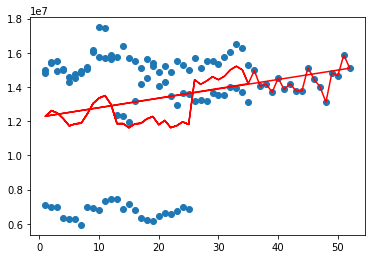

In [168]:
plt.scatter(X['Week_of_Year'], y)
plt.plot(X['Week_of_Year'], predictions, color='red')

In [137]:
### This graph and R2 shows that we can only predict the sales based on what week of the year with a 12 % accuracy. 

In [138]:
### Now trying to determine if promos effect sales ###


In [139]:
### Code below implementeed from https://harvard-iacs.github.io/2018-CS109A/lectures/lecture-23/demo/ ###

In [ ]:
# H(NULL)=The Promos have no effect on sales
# H1== Promos have an effect on sales price

In [291]:
acne_df=acne_df.astype(int)
acne_df1=acne_df.dropna()

In [218]:
#creating the sales and promo measures for each group
controlgroup = acne_df1['Acne'][acne_df1['acne_promo']==0]
trt1group = acne_df1['Acne'][acne_df1['acne_promo']==1]


In [ ]:

# The two-sample t-test is used to test whether the unknown means of two groups are equal or not.

In [221]:
#two sample t-test testing promo and non promo group
sp.stats.ttest_ind(controlgroup,trt1group)

Ttest_indResult(statistic=-2.350854292899001, pvalue=0.020511660873746725)

In [223]:
#ANOVA F-test
sp.stats.f_oneway(controlgroup,trt1group)

F_onewayResult(statistic=5.526515906441659, pvalue=0.020511660873746774)

In [ ]:
## P <.05 so we reject the NULL Hyptohesis and conclude that promos are affecting sales performance. 

In [ ]:
##insert graph here

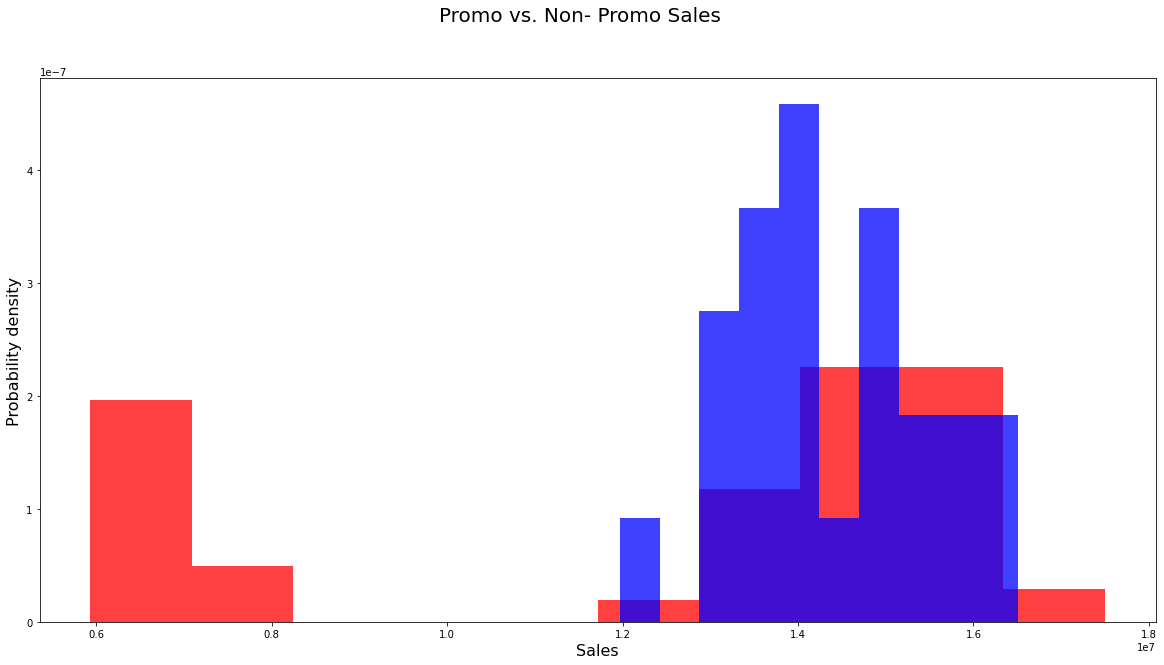

In [231]:
fig = plt.figure(figsize= (20, 10))
ax = fig.add_subplot(111)


p_bp_male = plt.hist(acne_df1['Acne'][acne_df1['acne_promo']==0], label= "Non-Promos",color="red",
                     density= True,
                     alpha=0.75)
p_bp_female = plt.hist(acne_df1['Acne'][acne_df1['acne_promo']==1], label= "Promos",color="blue",
                       density= True,
                       alpha=0.75)


plt.suptitle("Promo vs. Non- Promo Sales", fontsize= 20)
plt.xlabel("Sales", fontsize= 16)
plt.ylabel("Probability density", fontsize= 16)



plt.show()


In [ ]:
## Running SVR PRediction on Acne Sales prices

In [261]:
acne_df1.head()

Date,Acne,acne_promo
2019-01-05,14969813,0
2019-01-12,15488855,0
2019-01-19,15522357,0
2019-01-26,15054219,0
2019-02-02,14585357,0


In [294]:
acne_df["Week"]=acne_df.index.weekofyear

C:\Users\Dev\Anaconda3\envs\pyviz\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


In [295]:
acne_df

Date,Acne,acne_promo,Week
2019-01-05,14969813,0,1
2019-01-12,15488855,0,2
2019-01-19,15522357,0,3
2019-01-26,15054219,0,4
2019-02-02,14585357,0,5
...,...,...,...
2021-05-24,6622980,0,21
2021-05-31,6564619,0,22
2021-06-07,6727304,0,23
2021-06-14,6976630,0,24


In [302]:
acne_df=acne_df.drop(columns="acne_promo")

KeyError: "['acne_promo'] not found in axis"

In [303]:
acne_df

Date,Acne,Week
2019-01-05,14969813,1
2019-01-12,15488855,2
2019-01-19,15522357,3
2019-01-26,15054219,4
2019-02-02,14585357,5
...,...,...
2021-05-24,6622980,21
2021-05-31,6564619,22
2021-06-07,6727304,23
2021-06-14,6976630,24


In [514]:

X = acne_df.iloc[:,0].values     
y = acne_df.iloc[:,1].values        

In [515]:
# split the dataset into test set and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [516]:
X_train[:3]
# some features are big in scale, so adjust the scale

array([14926075,  6998077, 16311048])

In [517]:
 X_train= X_train.reshape(-1,1)
 y_train= y_train.reshape(-1,1)
 X_test = X_test.reshape(-1,1)

In [518]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [519]:
# PAY ATTENTION, WE ARE IMPORTING SVR, WHICH IS FOR REGRESSION
from sklearn.svm import SVR

In [544]:
regressor = SVR(kernel = 'rbf') # using rbf kernel
# also, we here call it a regressor, since it is a regression

# in SVC = support vector classification, many name it as a classifier

In [545]:
regressor.fit(X_train, y_train)

C:\Users\Dev\Anaconda3\envs\pyviz\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [546]:
predictions = regressor.predict(X_test)

In [547]:
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
rmse

12.01002921545336

In [548]:
r2_score(y_test,predictions)

0.13814597635996462

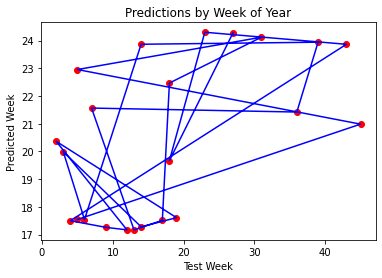

In [549]:
# Visualising the Regression results
plt.scatter(y_test, predictions, color = 'red')
plt.plot(y_test, predictions, color = 'blue')
plt.title('Predictions by Week of Year')
plt.xlabel('Test Week')
plt.ylabel('Predicted Week')
plt.show()

In [13]:
baby_df= sales_df[["Baby", "baby_promo"]]

In [14]:
baby_df

Date,Baby,baby_promo
5-Jan-19,1417338,0
12-Jan-19,1515492,0
19-Jan-19,1562793,0
26-Jan-19,1555259,0
2-Feb-19,1638797,0
...,...,...
24-May-21,135259,0
31-May-21,131590,0
7-Jun-21,143073,0
14-Jun-21,155264,0


<AxesSubplot:>

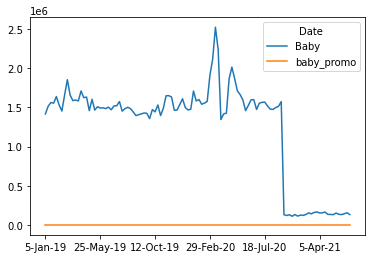

In [15]:
baby_df.plot()